### Limits of Linear Regression

In [1]:
#Import pandas
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
type(brfss)

pandas.core.frame.DataFrame

In [2]:

from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
# Compute the linear regression
res = linregress(xs, ys)
print(res)
subset.shape

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)


(75426, 9)

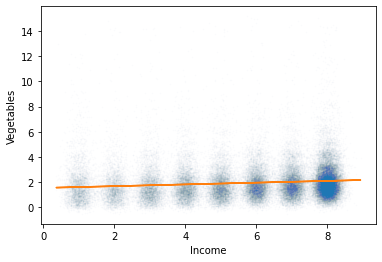

In [3]:
income_jitter = xs + np.random.normal(0, 0.2, size = len(xs))
veg_jitter = ys + np.random.normal(0, 0.2, size = len(ys))
plt.plot(income_jitter, veg_jitter, 'o', alpha = 0.01, markersize = 1)
fx = income_jitter
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.xlabel('Income')
plt.ylabel('Vegetables')
plt.show()

Linear regression fit doesnot looks good here.

In [4]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
ys = subset['INCOME2']
xs = subset['_VEGESU1']
# Compute the linear regression
res = linregress(xs, ys)
print(res)
subset.shape

LinregressResult(slope=0.2049345224314748, intercept=5.450700189148757, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0061907406152207165, intercept_stderr=0.014410966163933092)


(75426, 9)

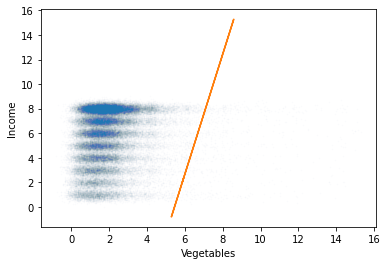

In [5]:
veg_jitter = xs + np.random.normal(0, 0.25, size = len(xs))
income_jitter = ys + np.random.normal(0, 0.25, size = len(ys))
plt.plot(veg_jitter, income_jitter, 'o', alpha = 0.01, markersize = 1)
fx = veg_jitter
fy = res.intercept + res.slope * fx
plt.plot(fy, fx, '-')
plt.xlabel('Vegetables')
plt.ylabel('Income')
plt.show()

Also, we observed that regression line is different when we plot income vs vegetables and vegetables vs income. i.e. Regression is not symmetrical.

Regression cannot tell what causes what. One variable might cause another or vice-versa and there might also be unconsidered variables that causes both. Regression alone cannot explain it.

However, we have tools for teasing apart relationships among multiple variables; one of the most important is multiple regression. For Multiple Regression, we can use statsmodel.

In [6]:
import statsmodels.formula.api as smf

In [7]:
results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss).fit()

In [8]:
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [9]:
##Example
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


####################################################################

### Miltiple Regresion

In [10]:
gss = pd.read_hdf('gss.hdf5', 'gss')
type(gss)

pandas.core.frame.DataFrame

We run a regression of real income as a function of years of education. 

In [11]:
results = smf.ols('realinc ~educ', data = gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

The estimated slope is 3586, which means that each additional year of education is associated with an increase of almost $3600 of income. But income also depends on age, so it would be good to include that in the model, too.

On the right side of the formula, we can list as many variables as we like, In this case, we have educ and age. The plus sign indicates that we expect the contributions of the two variables to be additive, which is a common assumption for models like this.

In [12]:
results = smf.ols('realinc ~ educ + age', data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

The estimated slope for education is 3655, a little more than in the previous model. The estimated slope for age is only about $80 per year, which is surprisingly small.

So, let's look at Income and Age.

In [13]:
grouped = gss.groupby('age')

In [14]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In some cases, DataFrameGroupBy object works similarly as pandas DataFrame.

In [15]:
mean_income_by_age = grouped['realinc'].mean()

In [16]:
mean_income_by_age

age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64

Let's plot the data.

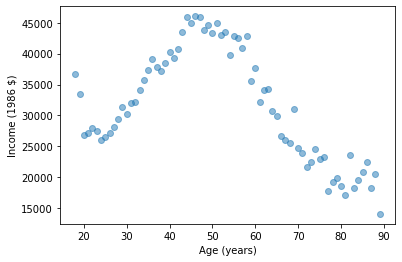

In [17]:
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

Average income increases from age 20 to age 50, then starts to fall. And that explains why the estimated slope is so small, because the relationship is non-linear. Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!

To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables.

In [18]:
gss['age2'] = gss['age']**2

In [19]:
model = smf.ols('realinc ~ educ + age + age2', data = gss).fit()
model.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

The slope associated with age is substantial, about $1700 per year. The slope associated with age2 is about -17, which is harder to interpret.

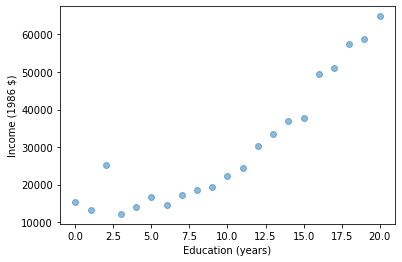

In [20]:
##Example
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [21]:
##Example
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data = gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


########################################################################

### Visualizing Regression Results

We ran a multiple regression model to characterize the relationship between income and age. Because the model is non-linear, the parameters are hard to interpret. So, let's interpret visually.

Let's generate a new dataframe and observe it for understanding:

In [22]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

#### Generating Predictions

In [23]:
df['educ'] = 12
df['educ2'] = df['educ']**2

In [24]:
pred12 = results.predict(df)

#### Plotting Predictions

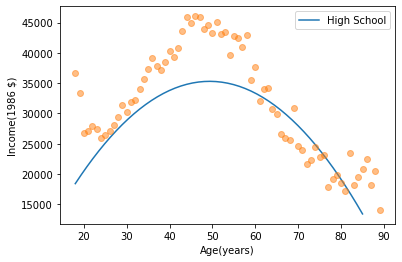

In [25]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age(years)')
plt.ylabel('Income(1986 $)')
plt.legend()

In [26]:
df['educ'] = 14
df['educ2'] = df['educ']**2

In [27]:
pred14 = results.predict(df)

In [28]:
df['educ'] = 16
df['educ2'] = df['educ']**2

In [29]:
pred16 = results.predict(df)

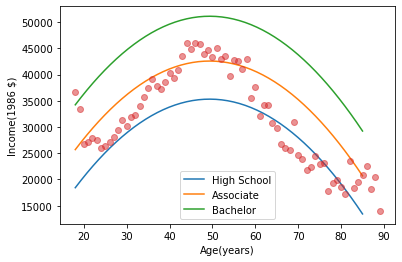

In [30]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(df['age'], pred14, label = 'Associate')
plt.plot(df['age'], pred16, label = 'Bachelor')
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age(years)')
plt.ylabel('Income(1986 $)')
plt.legend()

The lines show mean income, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

In [31]:
##Example
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


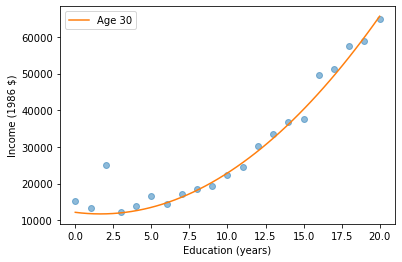

In [32]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In case of categorical variables; sex in this case, we can proceed in following way.

In [33]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data = gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

One sex is considered default, whereas for the other we can see a parameter.

In [34]:
# For logistic regression, let's create a boolean column.
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

Here, 1 means Yes and 2 means no.\
But in order to use logistic regression, we need to convert it in terms of 0 and 1.

In [35]:
gss['gunlaw'].replace([2], [0], inplace = True)

In [36]:
formula = 'gunlaw ~ educ + educ2 + age + age2 + C(sex)'
results = smf.logit(formula, data = gss).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [37]:
results.params

Intercept      1.653862
C(sex)[T.2]    0.757249
educ          -0.124373
educ2          0.006653
age           -0.018849
age2           0.000189
dtype: float64

Positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. 

In [38]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2
df['sex'] = 1
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)


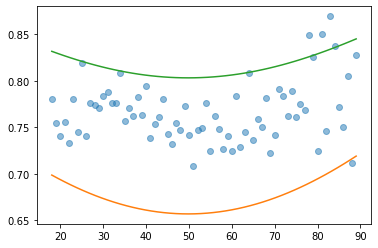

In [39]:
#Visualizing by age
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha = 0.5)

plt.plot(df['age'], pred1, label = 'Male')
plt.plot(df['age'], pred2, label = 'Female')